# Research Classifier

This is a research classifier with themes set for educational research. The input document is a word doc. Bold text is stripped out and headings are not processed. 

Sentences in the document are split out and the classified by GPT3.5 turbo in to themes are are provided in the array below. 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import docx
import nltk
import openai


In [19]:

#Inputs

openai.api_key = "YOUR_KEY"

doc = docx.Document('Sentences.docx')

themes = ['Leadership', 
          'Assessment', 
          'Wellbeing', 
          'Self-belief', 
          'Challenge', 
          'Motivation', 
          'Learning styles', 
          'Teacher-student relationship', 
          'Parental involvement', 
          'Curriculum design', 
          'Critical thinking', 
          'Creativity', 
          'Peer collaboration', 
          'Multicultural education', 
          'STEM education', 
          'Inclusive education', 
          'Digital literacy', 
          'Emotional intelligence', 
          'Student engagement', 
          'Educational technology', 
          'Classroom management']



In [20]:

# Process the text document
doc_text = ''
for paragraph in doc.paragraphs:
    if paragraph.style.name.startswith('Heading'):
        # skip headings
        continue
    for run in paragraph.runs:
        if run.bold:
            # skip bolded text
            continue
        doc_text += run.text

    doc_text += '\n'

# split into sentences
sentences = nltk.sent_tokenize(doc_text)

In [15]:
# Make the gpt prompt

themes = ['Leadership', 'Assessment', 'Wellbeing', 'Self-belief', 'Challenge', 'Motivation', 'Learning styles', 'Teacher-student relationship', 'Parental involvement', 'Curriculum design', 'Critical thinking', 'Creativity', 'Peer collaboration', 'Multicultural education', 'STEM education', 'Inclusive education', 'Digital literacy', 'Emotional intelligence', 'Student engagement', 'Educational technology', 'Classroom management']

themes_str = ','.join(themes)

command = "You are strictly a classifier. You must return 2 of the words from the following list for each sentence based on what you think the sentence is related to. There is to be no padding or punctuation. Nothing else. If you are unable to understand the sentence output 'unclassified' only. This is the list:"

prompt = command+"["+themes_str+"]"

In [5]:
prompt

"You are strictly a classifier. You must return 2 of the words from the following list for each sentence based on what you think the sentence is related to. There is to be no padding or punctuation. Nothing else. If you are unable to understand the sentence output 'unclassified' only. This is the list:[Leadership,Assessment,Wellbeing,Self-belief,Challenge,Motivation,Learning styles,Teacher-student relationship,Parental involvement,Curriculum design,Critical thinking,Creativity,Peer collaboration,Multicultural education,STEM education,Inclusive education,Digital literacy,Emotional intelligence,Student engagement,Educational technology,Classroom management]"

In [21]:
# Run GPT 3.5 on OpenAI

output = []

for sentence in sentences:
    completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo", 
  messages = [{"role": "system", "content" : prompt},
{"role": "user", "content" : "How are you?"},
{"role": "assistant", "content" : "I am doing well"},
{"role": "user", "content" : sentence}]
)
    classification = completion["choices"][0]["message"]["content"]
    
    output.append((sentence, classification))

AuthenticationError: Incorrect API key provided: YOUR_KEY. You can find your API key at https://platform.openai.com/account/api-keys.

In [7]:
# Data output to pandas dataframe

df = pd.DataFrame(output, columns=['Sentence', 'Classification'])

df['Classification'] = df['Classification'].str.replace('.', '', regex=False)

# Split Classification column into two columns based on comma
df[['Class1', 'Class2']] = df['Classification'].str.split(',', expand=True)

# Drop the original Classification column
df.drop('Classification', axis=1, inplace=True)



In [10]:
df

,Sentence,Class1,Class2
0,\n\n\nI was kind of thinking about this the ot...,Leadership,Coaching
1,I actually did a recent leadership survey and ...,Leadership,Assessment
2,What kind of leadership animal are you?,Leadership,Challenge
3,And there’s like 5 ones where you can be like ...,Unclassified,None
4,I think there’s a nuance to leadership cause I...,Leadership,Individualization
5,Sometimes people need a win.,Motivation,Challenge
6,It’s not necessarily about right or wrong.,Critical thinking,Self-belief
7,It’s that they need a win for where they are e...,Motivation,Emotional intelligence
8,It could be this simple thing where I say I wa...,Leadership,Challenge
9,So it’s about development and growth so I woul...,Learning styles,Self-belief


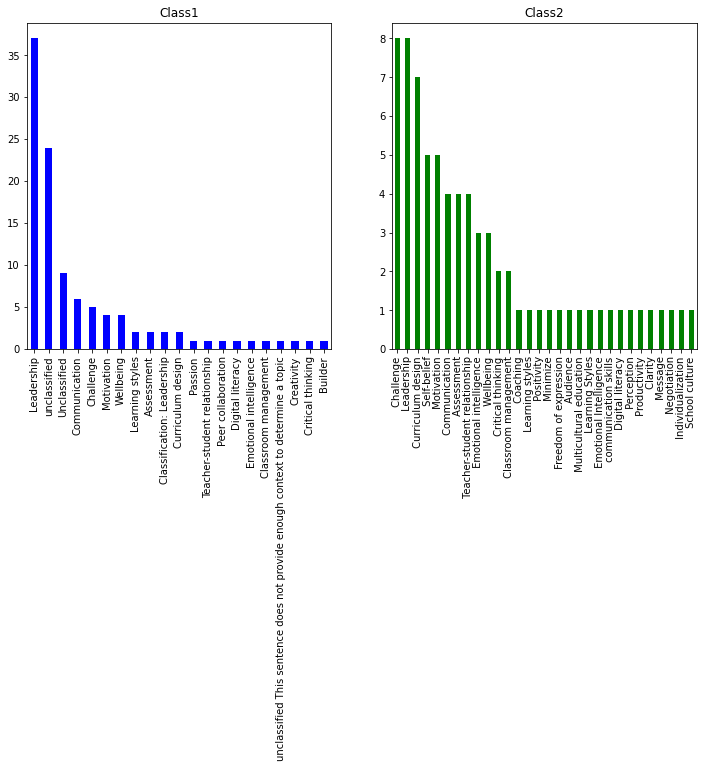

In [9]:
#Graph it

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
df['Class1'].value_counts().plot(kind='bar', ax=ax[0], color='b')
ax[0].set_title('Class1')
df['Class2'].value_counts().plot(kind='bar', ax=ax[1], color='g')
ax[1].set_title('Class2')
plt.show()